# Приоритизация гипотез и анализ A/B-теста

# Описание проекта

Заказчик исследования - крупный интернет-магазин. <br>
Цель проекта - приоритизировать ряд гипотез, разработанных совместно с отделом маркетинга, запустить A/B-тест и проанализировать результаты.

## Приоритизация гипотез

In [1]:
# Импортируем библиотеки:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
from scipy import stats

In [2]:
# Прочтём файл:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 100
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В датасете hypothesis представлено 9 гипотез по увеличению выручки интернет-магазина со следующими указанными параметрами:
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [3]:
# Приводём колонки к нижнему регистру:
hypothesis.columns = map(str.lower, hypothesis.columns)

### Применение фреймворка ICE для приоритизации гипотез

In [4]:
# Рассчитаем показатель ICE:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']

# Cортируем по результатам ICE:
hypothesis[['hypothesis','ice']].sort_values('ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Видим, что гипотезы №8, 0, 7, 6 и 2 являются наиболее приоритетными задачами с позиции вероятного влияния их на выручку, без учёта пользовательского охвата.

### Применение фреймворка RICE для приоритизации гипотез

In [5]:
hypothesis['rice'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis','rice']].sort_values('rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Видим, что при расчёте методом RICE порядок изменился - тремя самыми перспективными гипотезами будут в порядке убывания № 7, 2, 0, 6 и 8.

### Сравнение приоритизации гипотез RICE / ICE

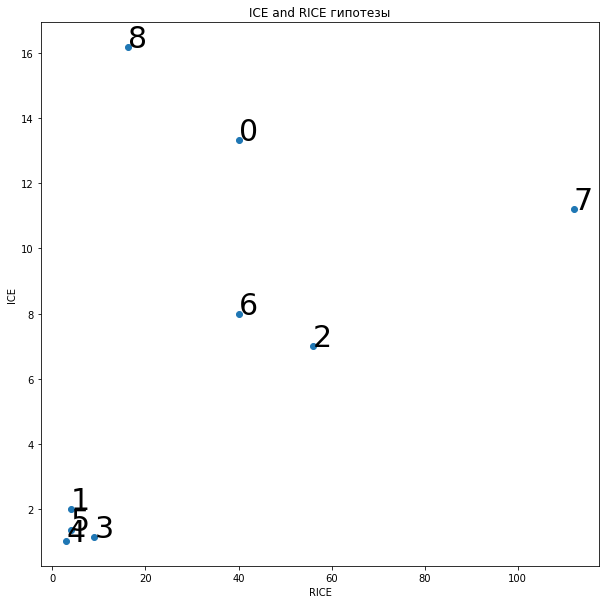

In [6]:
# Визуализируем гипотезы:

y = hypothesis['ice'] 
z = hypothesis['rice'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()    

Мы выяснили, что разный метод определения приоритета гипотез дал разные результаты:
- по методу ICE наиболее эффективны гипотезы № 8, 0 и 7;
- по методу RICE наиболее эффективны гипотезы № 7, 2 и 0.

Приоритет гипотез изменился после добавления в формулу расчёта показателя `Reach` (охват пользователей). Поэтому целесообразнее при определении приоритета гипотезы учитывать не только влияние на пользователей, затраты и степень уверенности в самой гипотезе, но и число пользователей, которых она затронет. Гипотеза 7 получается наиболее перспективна, т.к. помимо высоких impact и confidence, коснётся всех пользователей сайта.

Также можно заметить, что топ-5 гипотез для обоих подходов одинаков по составу.

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах orders и visitors. Теперь перед нами стоит задача проанализировать проведенный A/B-тест.

In [7]:
# Извлекаем данные о заказах:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head(5))
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Датасет orders содержит следующую информацию о заказах:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

In [8]:
# проверяем наличие явных дубликатов
print('Количество явных дубликатов:', orders.duplicated().sum())

Количество явных дубликатов: 0


In [9]:
# Извлекаем данные о количестве пользователей:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head(5))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Датасет visitors содержит следующую информацию о посетителях:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

In [10]:
# Приведем тип поля date к datetime:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [11]:
# Приводём колонки к нижнему регистру:
orders.columns = orders.columns.str.lower()

In [12]:
# проверяем наличие явных дубликатов
print('Количество явных дубликатов:', visitors.duplicated().sum())

Количество явных дубликатов: 0


### График кумулятивной выручки по группам

Построим график кумулятивной выручки по группам.

In [13]:
# Создадим массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date', 'group']].drop_duplicates()

# Соберём агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg({'date':'max', 'group':'max', 'transactionid':pd.Series.nunique, 'visitorid':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )
display(ordersAggregated)

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [14]:
# Соберём агрегированные кумулятивные по дням данные о посетителях:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                          .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
display(visitorsAggregated)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [15]:
# Объединим кумулятивные данные в одной таблице:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [16]:
# Проверим, совпадает ли минимальная дата в cumulativeData с минимальной датой в исходных данных:
cumulativeData['date'].min() == orders['date'].min() == visitors['date'].min()

True

In [17]:
# Проверим, совпадает ли максимальная дата в cumulativeData с максимальной датой в исходных данных:
cumulativeData['date'].max() == orders['date'].max() == visitors['date'].max()

True

Минимальная и максимальная даты в cumulativeData совпадают с минимальной и максимальной датой в исходных данных, значит  датафрейм cummulativeData был создан корректно. <br>

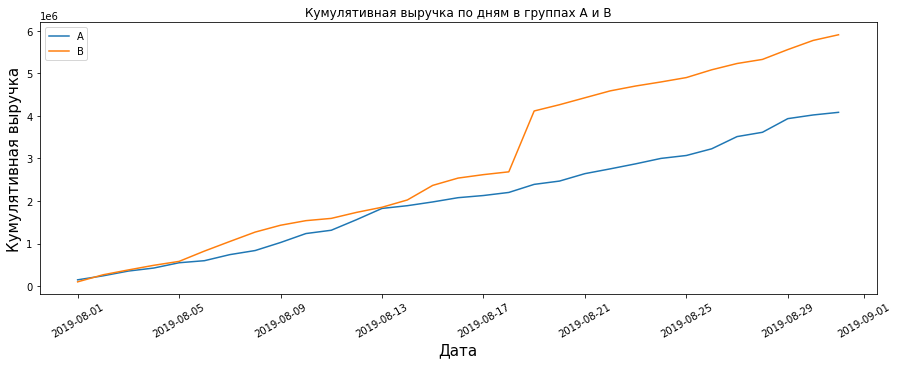

In [18]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:
cumulativeRevenueB =cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням в группах А и В', fontsize=12)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Кумулятивная выручка', fontsize=15)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

Из графика кумулятивной выручки по сырым данным видим, что А/В-тест длился весь календарный месяц - август 2019г. Причем в первой половигне месяца выручка по группам росла примерно равными темпами, и группа В показывала незначительно лучшие результаты. Однако 17 августа в группе В наблюдается резкий скачок вверх, эта группа существенно оторвалась от А и далее до конца теста темпы прироста выручки практически одинаковы. Скорее всего тогда в группу В попали какие-то аномальные заказы (возможно, крупные заказы), тем самым исказив график. Принимать решение по этой метрике рано, т.к. требуется дополнительнй анализ выбросов, которые искажают результаты.

###	График кумулятивного среднего чека по группам

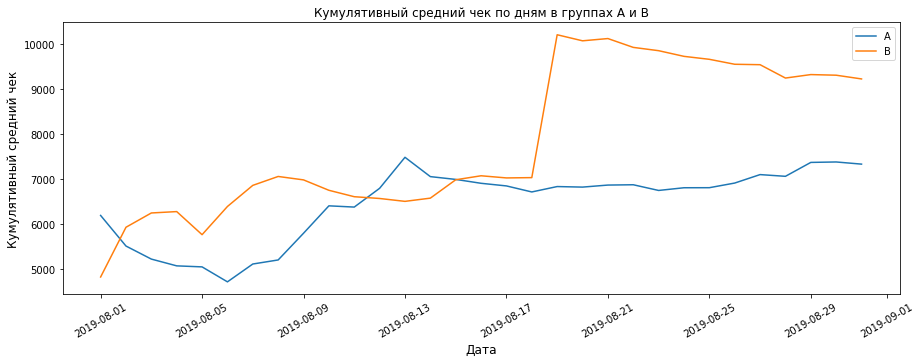

In [19]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по дням в группах А и В', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивный средний чек', fontsize=12)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

Средний чек примерно до 17-18 числа скачет и потом стабилизируется, однако здесь опять виднен гигантский скачок в группе В. Вероятно, в это время имели место несколько аномально крупных заказов, что ведет к невозможности сделать предположения о разнице в средних чеках по группам.

### График относительного изменения кумулятивного среднего чека группы B к группе A

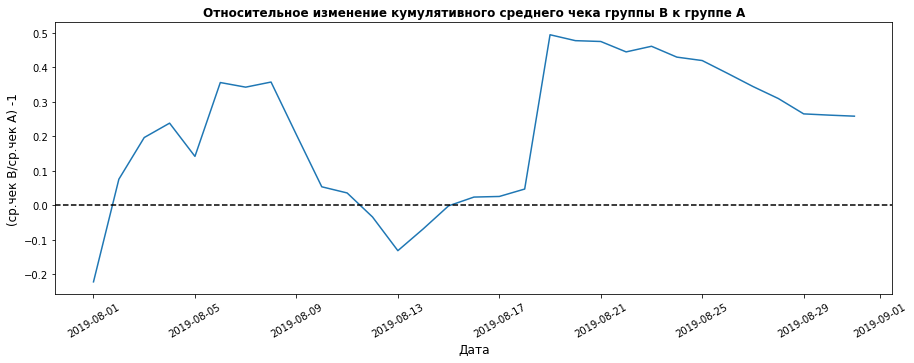

In [20]:
# Собираем данные в одном датафрейме:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(ср.чек В/ср.чек А) -1', fontsize=12)
plt.xticks(rotation=30)
plt.show()

Отношение кумулятивного среднего чека группы А к группе В показывает, что данное соотношение за исследуемый период имело два пика, когда средний чек группы B значительно превосходил этот показатель группы А, но быстро снижался после пика. Вероятно, такие изменения связаны с наличием выбросов в выборке.

###	График кумулятивной конверсии по группам

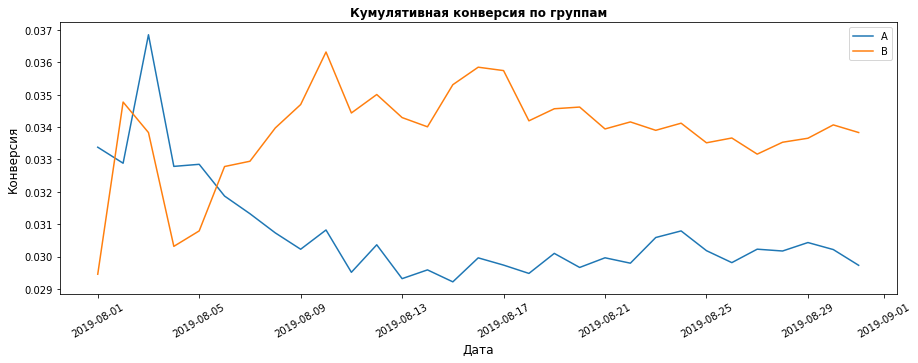

In [21]:
# Считаем кумулятивную конверсию:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Данные по группе A:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Данные по группе B:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.xticks(rotation=30)
plt.show()

Изначально в первую неделю опыта в обеих группах происходит скачок конверсии, после чего группы значительно расходятся. В группе А просиходит снижение конверсии с 0.037 до уровня 0.030, вокруг которого значение и находится на протяжении опыта. А вот в группе B после скачка до 0.035 происходит резкое снижение значения конверсии до 0.030 с последующим постепенным ростом до 0.036 и относительно стабильным средним значением конверсии в размере 0.034-0.035.

В общем, сначала конверсии колебались, но довольно быстро выровнялись и результат группы В оказался стабильно лучше, чем в группе А.

###	График относительного изменения кумулятивной конверсии группы B к группе A

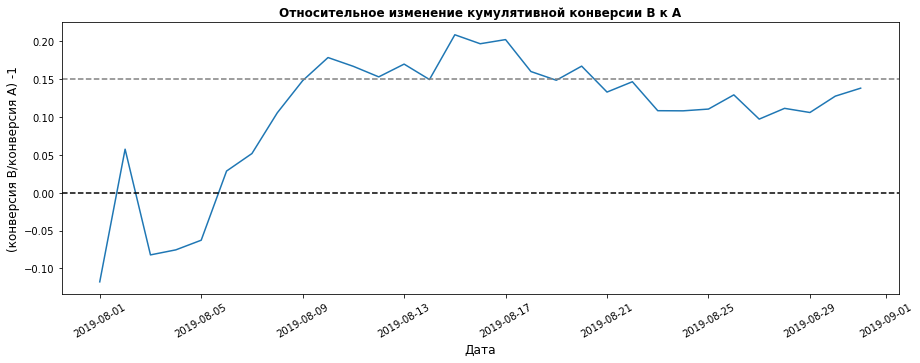

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
#plt.axis(['2019-08-01', '2019-08-31', -0.2, 0.3]) 
plt.title('Относительное изменение кумулятивной конверсии В к А', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(конверсия В/конверсия А) -1', fontsize=12)
plt.xticks(rotation=30)
plt.show()

Вскоре после начала теста конверсия группы В опередила конверсию А и до конца теста оставалась выше. На графике есть скачки, которые могут говорить о наличии выбросов в данных.

###	Точечный график количества заказов по пользователям

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

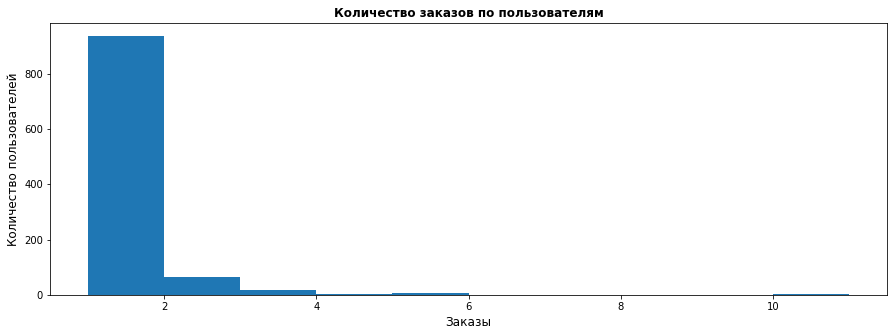

In [23]:
# Датафрейм с количеством заказов по пользователям:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['visitorid','orders']
#display(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 
display(ordersByUsers['orders'].describe())

plt.figure(figsize=(15,5))
plt.hist(ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.xlabel('Заказы', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

Видим, что большая часть значений принадлежит диапазону от 1 до 2 заказов.

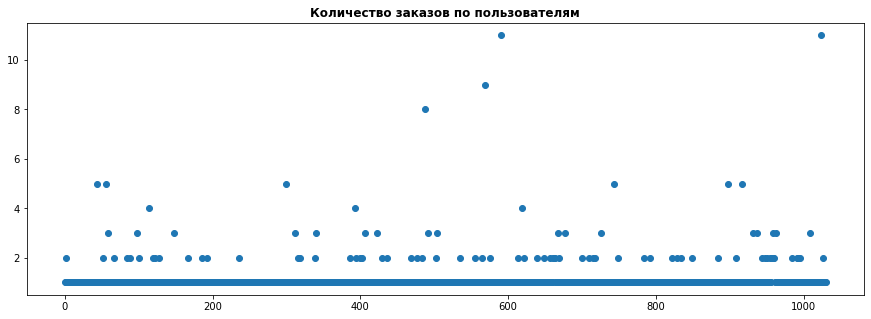

In [24]:
# Построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

Как и ранее, мы видим, что большая часть заказов принадлежит от 1 до 2 заказов на пользователя. Остальные значения, вероятно, являются выбросами.

###	Граница для определения аномальных пользователей

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Видим, что не более 5% пользователей оформляли более 2-х заказов, и не более 1% - свыше 4-х заказов. **Отсеим пользователей, у которых больше 3 заказов.**

###	Точечный график стоимостей заказов

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

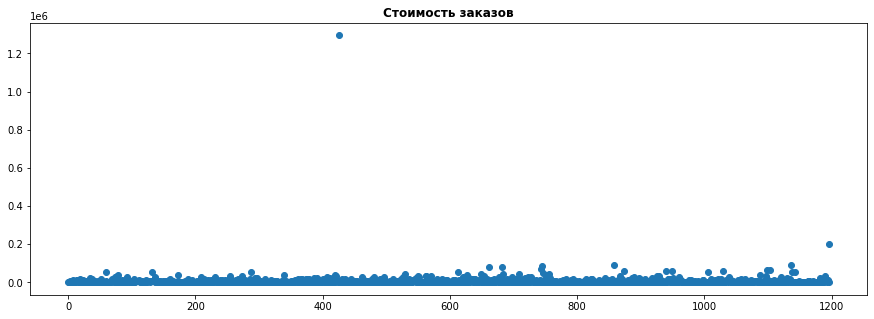

In [26]:
display(orders['revenue'].describe())

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.show()

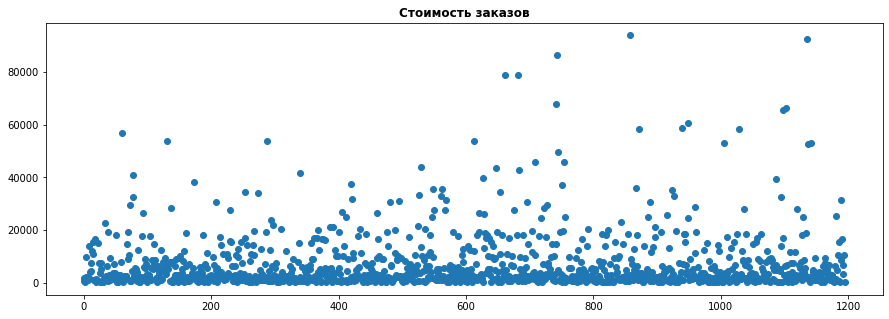

In [27]:
# Построим более наглядный график, для это уберем явные выбросы с 'revenue' большим 150 тыс:
x_values = pd.Series(range(0,len(orders[orders['revenue']<=150000]['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders[orders['revenue']<=150000]['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.show()

На графике видим заказ на 1,3 млн и на 200 тысяч, которые явно выбиваются из общего порядка. Посчитаем перцентили для отсева.

###	Граница для определения аномальных заказов

In [28]:
# выведем значения 90-го, 95-го и 99-го перцентилей
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% заказов дороже 28 тыс рублей и не более 1% дороже 58,2 тыс рублей. **Будем отсеивать заказы стоимостью свыше 28000 рублей.**

###	Статистическая значимость различий в конверсии между группами по «сырым» данным

In [29]:
# Подготовим датафрейм с фактическими и кумулятивными данными по дням:

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = (ordersADaily
                      .apply(lambda x:ordersADaily[ordersADaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateA':'sum',
                                    'revenuePerDateA':'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = (ordersBDaily
                      .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateB':'sum',
                                    'revenuePerDateB' : 'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
       )

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [30]:
# Создадим для каждой группы датафрейм с количеством заказов на пользователя:

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

In [31]:
# Создадим списки с числом заказов каждого пользователя, включая нули:

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [32]:
# Функция для проверки гипотезы о равенстве групп dataA и dataB
def stat_significance(dataA, dataB):
    # Нулевая гипотеза H0: между группами dataA и dataB нет статистически значимой разницы
    alpha = 0.05
    p_value = stats.mannwhitneyu(dataA, dataB)[1]

    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами ЕСТЬ РАЗНИЦА")
    else:
        print("Не получилось отвергнуть нулевую гипотезу: разницы нет между группами")
    
    print("Относительный выигрыш/проигрыш В к А: {0:.1%}".format(dataB.mean()/dataA.mean()-1))

**За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.**

In [33]:
stat_significance(sampleA, sampleB)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами ЕСТЬ РАЗНИЦА
Относительный выигрыш/проигрыш В к А: 13.8%


Р-value = 0.017 значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем, т.е. **между группами есть разница.** Относительный прирост конверсии группы B к группе А составляет 13.8%.

###	Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.**

In [34]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу: разницы нет между группами
Относительный выигрыш/проигрыш В к А: 25.9%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A: на 25,9%: необходимо рассмотреть относительные различия в среднем чеке по "очищенным" данным.

###	Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [35]:
# Выделим из базы "аномальных" пользователей (совершивших более 3-го заказов или сумма заказа которых > 28000):

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], [95, 99])[0]+1)]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], [95, 99])[0]+1)]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print()
print('Количество "аномальных" пользователей:', abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorid, dtype: int64

Количество "аномальных" пользователей: 63


In [36]:
# Создадим списки с числом заказов каждого пользователя, включая нули, но уже по очищенным данным:

sampleAFiltered = pd.concat([ordersByUsersA[~(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[~(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)


**За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.**

In [37]:
stat_significance(sampleAFiltered, sampleBFiltered)

P-value: 0.018
Отвергаем нулевую гипотезу: между группами ЕСТЬ РАЗНИЦА
Относительный выигрыш/проигрыш В к А: 14.8%


По очищенным данным между конверсиями групп А и В по-прежнему есть статистически значимая разница. 
При этом относительный выигрыш группы В вырос на 1% по сравнению с "сырыми" данными и стал равен 14.8%.

###	Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.**

In [38]:
(stat_significance(
    orders[(orders['group']=='A') & ~(orders['visitorid'].isin(abnormalUsers))]['revenue'], 
    orders[(orders['group']=='B') & ~(orders['visitorid'].isin(abnormalUsers))]['revenue'])
)

P-value: 0.977
Не получилось отвергнуть нулевую гипотезу: разницы нет между группами
Относительный выигрыш/проигрыш В к А: -1.7%


По-прежнему, нет оснований считать, что средний чек группы В отличается от среднего чека группы А. По очищенным данным проигрыш среднего чека группы В относительно А составляет 1.7%.

###	Решение по результатам A/B-теста

Во второй части работы был выполнен анализ результатов A/B-теста, который был проведён в целях увеличения выручки. A/B-тест проводился в августе 2019 года, за всё время проведения теста было совершено 1197 покупок. Какая гипотеза подверглась проверке в исходных данных не раскрывается. 

В работе было выполено следующее:
- Построены графики кумулятивных метрик: выручки, среднего чека и конверсии по группам и графики относительного изменения среднего чека и конверсии группы B к группе A;
- Проведён анализ выбросов - посчитаны 95 и 99 перцентили числа и стоимости заказов, определены "аномальные" пользователи, к ним отнести пользователей совершивших более 3 заказов или заказ более чем на 28 тыс руб;
- Посчитана статистическая значимость различий в конверсии и среднем чеке как по исходным данным, так и по данным без выбросов.

Нами получены следующие результаты:<br>
**По исходным данным:**
- между конверсией в группах есть статистически важные различия, конверсия в групе B относительно группы A выше на 14%;
- по среднему чеку различий нет, средний чек в групе B относительно группы A выше на 26% (тут заметно влияние единичного заказа на очень большую сумму).

**По данным без выбросов:**
- между конверсией в группах есть статистически важные различия, конверсия в групе B относительно группы A выше на 15%;
- по среднему чеку различий также не появилось, хотя средний чек в "чистой" групе B относительно группы A теперь наоборот, ниже на 1,7% (это логично, т.к.обычно количество покупок растёт при уменьшении цены).

По анализу результатов A/B-теста принято решение остановить тест, зафиксировав победу тестовой группы. Группа B статистически лучше группы A по метрике конверсии, но различий в средних чеках нет.

По условиям задачи проверяется эффективность гипотезы в плане увеличения выручки и поскольку конверсия пользователей влияет на выручку и мы получили результат, что конверсия в тестовой группе значительно увеличилась, по сравнению с контрольной, даже с учётом того, что средний чек остался без изменений, нет никакого смысла и далее продолжать тест.